Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 80)                3520      
                                                                 
 dense_15 (Dense)            (None, 30)                2430      
                                                                 
 dense_16 (Dense)            (None, 15)                465       
                                                                 
 dense_17 (Dense)            (None, 10)                160       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,586
Trainable params: 6,586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\bartl\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\bartl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:77: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


804/804 [==============================] - 1s 889us/step - loss: 0.5938 - accuracy: 0.7093
Epoch 2/100
157/804 [====>.........................] - ETA: 0s - loss: 0.5764 - accuracy: 0.7239
Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 919us/step - loss: 0.5663 - accuracy: 0.7259
Epoch 3/100
338/804 [===========>..................] - ETA: 0s - loss: 0.5591 - accuracy: 0.7282
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 909us/step - loss: 0.5786 - accuracy: 0.7149
Epoch 4/100
577/804 [====================>.........] - ETA: 0s - loss: 0.5708 - accuracy: 0.7270
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 896us/step - loss: 0.5667 - accuracy: 0.7290
Epoch 5/100
743/804 [==========================>...] - ETA: 0s - loss: 0.5568 - accuracy: 0.7313
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [===========================

804/804 [==============================] - 1s 909us/step - loss: 0.5435 - accuracy: 0.7356
Epoch 40/100
612/804 [=====================>........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7384
Epoch 40: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 1s 932us/step - loss: 0.5430 - accuracy: 0.7367
Epoch 41/100
804/804 [==============================] - 1s 914us/step - loss: 0.5437 - accuracy: 0.7371
Epoch 42/100
  1/804 [..............................] - ETA: 0s - loss: 0.6057 - accuracy: 0.6562
Epoch 42: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 1s 940us/step - loss: 0.5439 - accuracy: 0.7379
Epoch 43/100
222/804 [=======>......................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7389
Epoch 43: saving model to checkpoints\weights.43.hdf5
804/804 [==============================] - 1s 948us/step - loss: 0.5425 - accuracy: 0.7371
Epoch 44/100
422/804 [==============>...............] - ETA: 0s - loss: 0.54

804/804 [==============================] - 1s 926us/step - loss: 0.5402 - accuracy: 0.7381
Epoch 78/100
 55/804 [=>............................] - ETA: 0s - loss: 0.5570 - accuracy: 0.7188
Epoch 78: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 1s 945us/step - loss: 0.5394 - accuracy: 0.7377
Epoch 79/100
279/804 [=========>....................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7388
Epoch 79: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 1s 950us/step - loss: 0.5392 - accuracy: 0.7374
Epoch 80/100
432/804 [===============>..............] - ETA: 0s - loss: 0.5379 - accuracy: 0.7351
Epoch 80: saving model to checkpoints\weights.80.hdf5
804/804 [==============================] - 1s 955us/step - loss: 0.5387 - accuracy: 0.7380
Epoch 81/100
640/804 [======================>.......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7401
Epoch 81: saving model to checkpoints\weights.81.hdf5
804/804 [===================

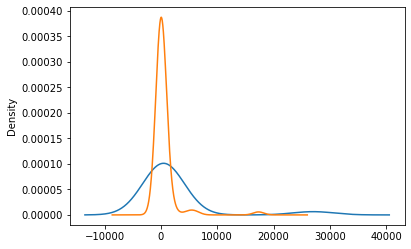

In [4]:
### Deliverable 1: Preprocessing the Data for a Neural Network

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'], axis=1)
application_df.head(2)

# Determine the number of unique values in each column.
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()

# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

# Look at CLASSIFICATION value counts for binning
class_type_count = application_df.CLASSIFICATION.value_counts()
class_type_count

# Visualize the value counts of CLASSIFICATION
class_type_count.plot.density()

# Determine which values to replace if counts are less than ..?
replace_class = list(class_type_count[class_type_count < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_cat

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="sigmoid", input_dim = num_input_features))

# Second hidden layer (Third attempt) 
#nn.add(tf.keras.layers.Dense(units=30, activation="tanh"))

# Second hidden layer (Second attempt)
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Third hidden layer 
nn.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Fourth hidden layer (Fourth attempt)
nn.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

# Third hidden layer (First attempt)
#nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

nn.save("checkpoints/AlphabetSoupCharity.h5")

